# Project - Forest Fire - (Fire Data Extraction, EDA, Join With Other Tables)

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

## Read Data

Fire database is too large to be uploaded to Git, it can be downloaded from the following link:\
Fire Data source: https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.4

In [2]:
conn = sqlite3.connect("Data/FPA_FOD_20170508.sqlite")

In [3]:
cursor = conn.cursor()
cursor. execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor. fetchall())

[('spatial_ref_sys',), ('spatialite_history',), ('sqlite_sequence',), ('geometry_columns',), ('spatial_ref_sys_aux',), ('views_geometry_columns',), ('virts_geometry_columns',), ('geometry_columns_statistics',), ('views_geometry_columns_statistics',), ('virts_geometry_columns_statistics',), ('geometry_columns_field_infos',), ('views_geometry_columns_field_infos',), ('virts_geometry_columns_field_infos',), ('geometry_columns_time',), ('geometry_columns_auth',), ('views_geometry_columns_auth',), ('virts_geometry_columns_auth',), ('sql_statements_log',), ('SpatialIndex',), ('ElementaryGeometries',), ('KNN',), ('Fires',), ('idx_Fires_Shape',), ('idx_Fires_Shape_node',), ('idx_Fires_Shape_rowid',), ('idx_Fires_Shape_parent',), ('NWCG_UnitIDActive_20170109',)]


Query to get the data from 2011 to the most recent possible.

In [4]:
wildfire = pd.read_sql_query ("select * from Fires where FIRE_YEAR>=2011", conn)
wildfire

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1453965,20020059,FS-1496314,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.246389,-149.349444,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x0042\x1b\xa6.\xabb\xc0...
1,1453966,20020060,FS-1496318,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.475833,-149.752500,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00\xadG\xe1z\x14\xb8b\...
2,1453967,20020061,FS-1496319,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.514444,-149.467500,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00(\\\x8f\xc2\xf5\xaeb...
3,1453968,20020062,FS-1496321,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.399722,-149.360833,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00\x03\xf5V\xf2\x8b\xa...
4,1453969,20020063,FS-1496322,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,A,60.467500,-149.973056,5.0,USFS,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00\x82\xeciE#\xbfb\xc0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370340,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
370341,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
370342,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
370343,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


## Undserstand the Data

In [11]:
wildfire.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,3.703450e+05,3.703450e+05,370345.000000,3.703450e+05,370345.000000,370345.000000,2.834160e+05,283416.000000,370345.000000,370345.000000,370345.000000,370345.000000
mean,1.665524e+06,2.365269e+08,2012.899721,2.456420e+06,164.504243,6.176570,2.456454e+06,166.180089,101.115841,37.098023,-96.537012,9.640079
std,1.215818e+05,5.679577e+07,1.466960,5.422507e+02,89.205681,3.528276,5.389812e+02,88.617870,3031.648522,5.992602,16.292403,4.031779
min,1.453965e+06,2.002006e+07,2011.000000,2.455562e+06,1.000000,1.000000,2.455562e+06,1.000000,0.000010,17.944924,-168.870000,0.000000
25%,1.569356e+06,2.014357e+08,2012.000000,2.455940e+06,90.000000,4.000000,2.456002e+06,92.000000,0.100000,32.854000,-109.753420,8.000000
50%,1.661967e+06,2.018219e+08,2013.000000,2.456410e+06,166.000000,5.000000,2.456446e+06,167.000000,0.800000,35.905917,-94.959383,8.000000
75%,1.774122e+06,3.001210e+08,2014.000000,2.456872e+06,230.000000,9.000000,2.456912e+06,231.000000,3.000000,41.165220,-82.700300,14.000000
max,1.880465e+06,3.003484e+08,2015.000000,2.457388e+06,366.000000,13.000000,2.457392e+06,366.000000,558198.300000,70.330600,-65.264175,15.000000


In [12]:
wildfire.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [13]:
set(wildfire['STAT_CAUSE_DESCR'])

{'Arson',
 'Campfire',
 'Children',
 'Debris Burning',
 'Equipment Use',
 'Fireworks',
 'Lightning',
 'Miscellaneous',
 'Missing/Undefined',
 'Powerline',
 'Railroad',
 'Smoking',
 'Structure'}

In [14]:
len(wildfire)

370345

### Which state has higher number of wildfires?

In [15]:
fire_year = pd.DataFrame(wildfire['FIRE_YEAR'].value_counts()).reset_index()

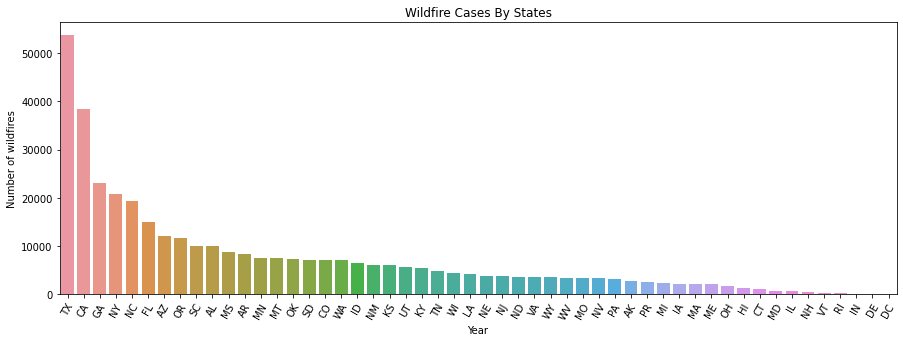

In [16]:
state_wf = wildfire.groupby(['STATE']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=state_wf.index, y=state_wf.values)
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Number of wildfires')
plt.title('Wildfire Cases By States')
plt.show()

### For the state with the most wildfires, what are some common reasons?

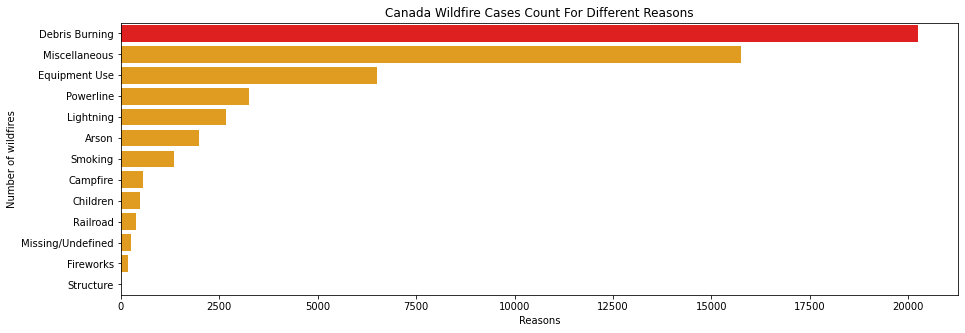

In [17]:
TX_wf = wildfire[wildfire['STATE']=='TX']
df_grouped = TX_wf.groupby(['STAT_CAUSE_DESCR']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
clrs = ['orange' if (x < max(df_grouped.values)) else 'red' for x in df_grouped.values]
sns.barplot(y=df_grouped.index, x=df_grouped.values, orient = 'h', palette=clrs)
plt.xlabel('Reasons')
plt.ylabel('Number of wildfires')
plt.title('Canada Wildfire Cases Count For Different Reasons')
plt.show()

## Plot the wildfire incidents by size class on locations

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

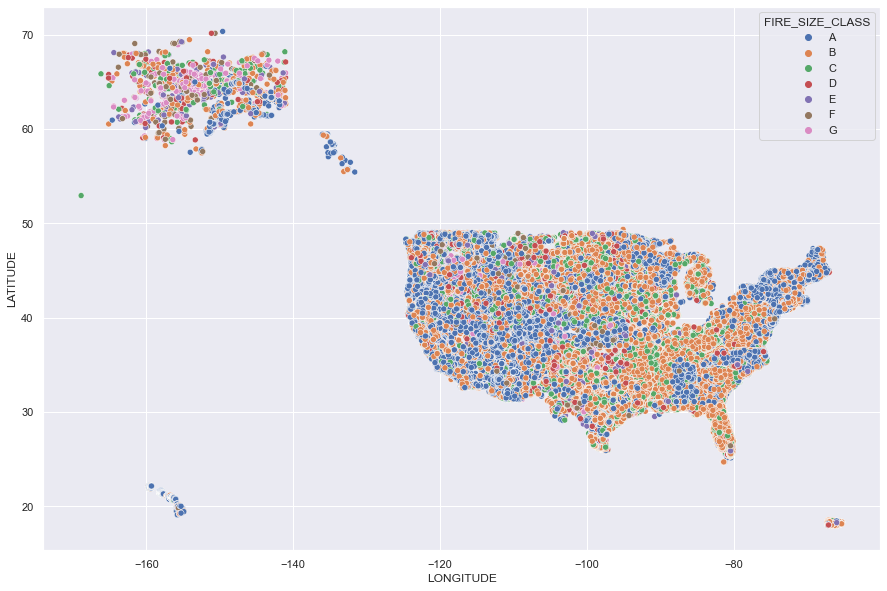

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=wildfire, hue="FIRE_SIZE_CLASS")

## Plot the wildfire average count on a heat map

In [19]:
count_wf = pd.DataFrame(wildfire.groupby(['LONGITUDE', 'LATITUDE']).size()).reset_index()

In [20]:
count_wf = count_wf.rename(columns={count_wf.columns[2]: 'count'})

In [21]:
count_wf

,LONGITUDE,LATITUDE,count
0,-168.870000,52.930000,1
1,-166.166700,65.833300,1
2,-165.130530,65.386700,1
3,-165.116700,60.516700,1
4,-165.116700,65.766700,1
...,...,...,...
352330,-65.305833,18.139167,1
352331,-65.288067,18.142695,1
352332,-65.273611,18.302778,1
352333,-65.270278,18.304167,1


In [22]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

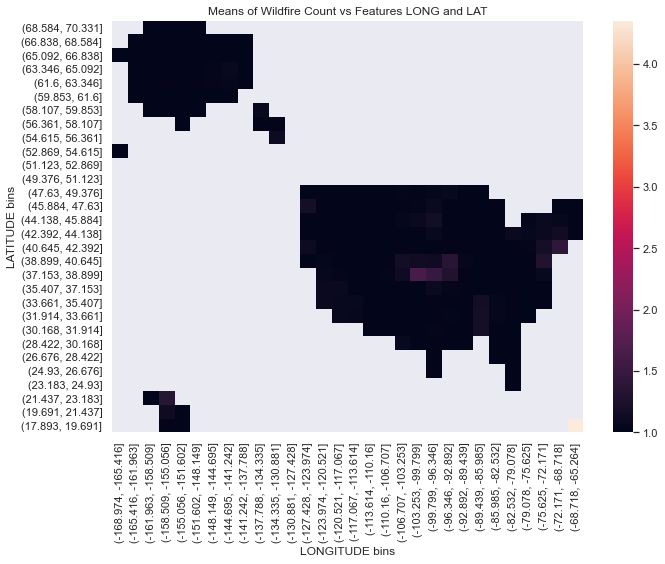

In [23]:
with plt.rc_context({'figure.figsize': (10,8)}):
    means = heatmap_bins(count_wf[['LONGITUDE', 'LATITUDE','count']],['LONGITUDE', 'LATITUDE'])
    plt.clf()
sns.heatmap(means['count'])
plt.title('Means of Wildfire Count vs Features LONG and LAT')
plt.tight_layout()